In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv('global air pollution dataset.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [135]:
df.shape

(23463, 12)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [139]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [141]:
df.drop(['City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Value'], axis=1, inplace=True)

In [143]:
df.isnull().sum()

Country               427
AQI Value               0
CO AQI Value            0
Ozone AQI Value         0
NO2 AQI Value           0
PM2.5 AQI Category      0
dtype: int64

In [145]:
df.dropna(subset=['Country'], inplace=True)

In [149]:
df.duplicated().sum()

4289

In [151]:
df = df.drop_duplicates()

In [159]:
df['PM2.5 AQI Category'].value_counts()

PM2.5 AQI Category
Moderate                          8190
Good                              6575
Unhealthy                         2024
Unhealthy for Sensitive Groups    1560
Very Unhealthy                     254
Hazardous                          144
Name: count, dtype: int64

In [161]:
print(df['PM2.5 AQI Category'].value_counts(normalize=True) * 100)

PM2.5 AQI Category
Moderate                          43.686990
Good                              35.072278
Unhealthy                         10.796394
Unhealthy for Sensitive Groups     8.321331
Very Unhealthy                     1.354883
Hazardous                          0.768123
Name: proportion, dtype: float64


In [163]:
all_countries = df['Country'].unique()
print(all_countries)

['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Plurinational State of)

In [165]:
X = df.drop('PM2.5 AQI Category', axis=1)
y = df['PM2.5 AQI Category']

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [169]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']
cat_features = ['Country']

num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [171]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Gaussian Pipeline
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=3,
        min_samples_leaf=50,
        # min_samples_split=50,
        class_weight='balanced',
        random_state=42
    ))
])

# SVC pipeline (with class_weight to handle imbalance)
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))
])


In [173]:
# Train NB
nb_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [175]:
dt_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [177]:
# Train SVC
svc_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [179]:
from sklearn.metrics import classification_report

# GaussianNB
y_pred_nb = nb_pipeline.predict(X_test)
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_nb))

# Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# SVC
y_pred_svc = svc_pipeline.predict(X_test)
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

GaussianNB Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.63      0.33      0.44      1315
                     Hazardous       0.03      0.97      0.06        29
                      Moderate       0.81      0.07      0.13      1638
                     Unhealthy       0.03      0.06      0.04       405
Unhealthy for Sensitive Groups       0.08      0.16      0.10       312
                Very Unhealthy       0.02      0.14      0.03        51

                      accuracy                           0.18      3750
                     macro avg       0.27      0.29      0.13      3750
                  weighted avg       0.59      0.18      0.22      3750

Decision Tree Classification Report:
                                 precision    recall  f1-score   support

                          Good       1.00      0.98      0.99      1315
                     Hazardous       0.93      0.97      0.

In [181]:
from sklearn.metrics import classification_report, accuracy_score

pipelines = {
    "GaussianNB": nb_pipeline,
    "Decision Tree": dt_pipeline,
    "SVC": svc_pipeline
}

for name, pipe in pipelines.items():
    # Predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred  = pipe.predict(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    
    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy : {test_acc:.4f}")
    
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

--- GaussianNB ---
Train Accuracy: 0.1898
Test Accuracy : 0.1768
Test Classification Report:
                                 precision    recall  f1-score   support

                          Good       0.63      0.33      0.44      1315
                     Hazardous       0.03      0.97      0.06        29
                      Moderate       0.81      0.07      0.13      1638
                     Unhealthy       0.03      0.06      0.04       405
Unhealthy for Sensitive Groups       0.08      0.16      0.10       312
                Very Unhealthy       0.02      0.14      0.03        51

                      accuracy                           0.18      3750
                     macro avg       0.27      0.29      0.13      3750
                  weighted avg       0.59      0.18      0.22      3750



--- Decision Tree ---
Train Accuracy: 0.9752
Test Accuracy : 0.9779
Test Classification Report:
                                 precision    recall  f1-score   support

           

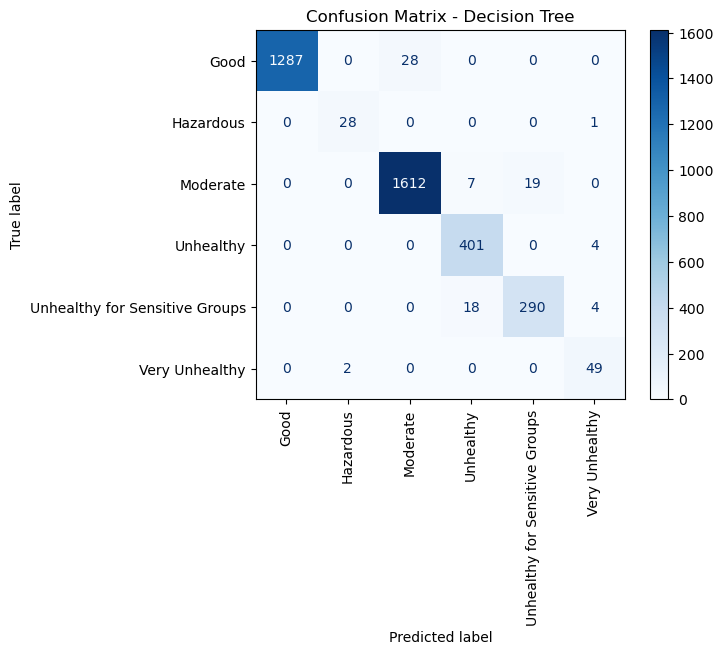

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Access classifier's classes through the pipeline
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=dt_pipeline.named_steps['classifier'].classes_)

# Plot
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [203]:
import joblib

joblib.dump(dt_pipeline, "dt_pipeline.joblib")

['dt_pipeline.joblib']

In [207]:
y_train.unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)